In [50]:
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from jupyter_notebook import load_parameters 

In [51]:
# import pandas as pd
# import os

# pars = load_parameters()

# input_file = pars.get('input')
# output_file = pars.get('output')

# dataset = pars.get('dataset')

# input_col = pars.get('input_col')
# output_col = pars.get('output_col')

# debug = pars.get('debug')

In [52]:
import pandas as pd
import os

data_folder = os.path.join('..', '..', 'data', 'stack-overflow')

dataset_file = os.path.join(data_folder, 'Dataset - Pandas.csv')
real_code_file = os.path.join(data_folder, 'pandas-preprocessedcode-dataset-part3')



In [53]:
dataset = pd.read_csv(dataset_file, sep=',')
code = pd.read_pickle(real_code_file)


In [54]:
# Remove non answers
answerIds = dataset.AnswerId.unique()

print("Amount of answers in the dataset: %d" % len(answerIds))

Amount of answers in the dataset: 58


In [66]:
dataset_code = code[code.Id.isin(answerIds)]
dataset_code = dataset_code.set_index('Id')

dataset_code['Code List'] = dataset_code['PreprocessedCode3'].apply(lambda x: x.split(os.linesep))
dataset_code

,Unnamed: 0,Unnamed: 0.1,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,...,PostTypeId,Score,Tags,Title,ViewCount,Code,PreprocessedCode,PreprocessedCode2,PreprocessedCode3,Code List
Id,,,,,,,,,,,,,,,,,,,,,
10374456,195,195,NaN,NaN,<p><code>g1</code> here <em>is</em> a DataFram...,NaN,4,NaN,2012-04-29T17:50:33.950,NaN,...,2,241,NaN,NaN,NaN,In [19]: type(g1)\r\nOut[19]: pandas.core.fram...,In [19]: type(g1)\r\nOut[19]: pandas.core.fram...,type(g1)\r\ng1.index\r\ng1.add_suffix('_Count'...,type(g1)\r\ng1.index\r\ng1.add_suffix('_Count'...,"[type(g1), g1.index, g1.add_suffix('_Count').r..."
11287278,414,414,NaN,NaN,<p>The column names (which are strings) cannot...,NaN,12,NaN,2012-07-02T02:43:02.740,NaN,...,2,490,NaN,NaN,NaN,"df1 = df[['a','b']]\r\ndf1 = df.ix[:,0:2] # Re...","df1 = df[['a','b']]\r\ndf1 = df.ix[:,0:2] # Re...","df1 = df[['a','b']]\r\ndf1 = df.ix[:,0:2] # Re...","df1 = df[['a','b']]\r\ndf1 = df.ix[:,0:2] # Re...","[df1 = df[['a','b']], df1 = df.ix[:,0:2] # Rem..."
11346337,434,434,NaN,NaN,<p>Just assign it to the <code>.columns</code>...,NaN,9,NaN,2012-07-05T14:23:27.910,NaN,...,2,768,NaN,NaN,NaN,">>> df = pd.DataFrame({'$a':[1,2], '$b': [10,2...","df = pd.DataFrame({'$a':[1,2], '$b': [10,20]})...","df = pd.DataFrame({'$a':[1,2], '$b': [10,20]})...","df = pd.DataFrame({'$a':[1,2], '$b': [10,20]})...","[df = pd.DataFrame({'$a':[1,2], '$b': [10,20]}..."
11354850,439,439,NaN,NaN,<p>Use the rename function and refer the colum...,NaN,6,NaN,2012-07-06T01:48:15.147,NaN,...,2,1304,NaN,NaN,NaN,df = df.rename(columns={'oldName1': 'newName1'...,df = df.rename(columns={'oldName1': 'newName1'...,df = df.rename(columns={'oldName1': 'newName1'...,df = df.rename(columns={'oldName1': 'newName1'...,[df = df.rename(columns={'oldName1': 'newName1...
11531402,499,499,NaN,NaN,"<p>Based on github issue <a href=""https://gith...",NaN,5,NaN,2012-07-17T21:52:18.983,NaN,...,2,267,NaN,NaN,NaN,"df[df['A'].str.contains(""hello"")]\r\n","df[df['A'].str.contains(""hello"")]\r\n","df[df['A'].str.contains(""hello"")]\r\n","df[df['A'].str.contains(""hello"")]","[df[df['A'].str.contains(""hello"")]]"
11617194,521,521,NaN,NaN,<p>The newest versions of pandas now include a...,NaN,4,NaN,2012-07-23T17:09:39.743,NaN,...,2,209,NaN,NaN,NaN,"for index, row in df.iterrows():\r\n\r\n # ...","for index, row in df.iterrows():\r\n\r\n # ...","for index, row in df.iterrows():\r\n\r\n # ...",,[]
12065904,696,696,NaN,NaN,<p>Use the <code>isin</code> method. <code>rp...,NaN,12,NaN,2012-08-22T03:21:12.067,NaN,...,2,326,NaN,NaN,NaN,,,,,[]
12681217,1018,1018,NaN,NaN,<p>How about something like this:</p>\r\n\r\n<...,NaN,8,NaN,2012-10-01T21:15:03.957,NaN,...,2,22,NaN,NaN,NaN,"In [55]: pd.concat([Series(row['var2'], row['v...","In [55]: pd.concat([Series(row['var2'], row['v...","pd.concat([Series(row['var2'], row['var1'].spl...","pd.concat([Series(row['var2'], row['var1'].spl...","[pd.concat([Series(row['var2'], row['var1'].sp..."
13270110,1332,1332,NaN,NaN,<p>If you have a key that is repeated for each...,NaN,1,NaN,2012-11-07T12:47:36.283,NaN,...,2,31,NaN,NaN,NaN,"from pandas import DataFrame, merge\r\ndf1 = D...","from pandas import DataFrame, merge\r\ndf1 = D...","from pandas import DataFrame, merge\r\ndf1 = D...","from pandas import DataFrame, merge\r\ndf1 = D...","[from pandas import DataFrame, merge, df1 = Da..."


In [71]:
def isNotEmptyOrImportStm(data):
    return data != '' and not data.startswith('import') and not data.startswith('from')

snippet_size = dataset_code['Code List'].apply(lambda x: len([y for y in x if y != '']))

snippet_size_wo_imports = dataset_code['Code List'].apply(lambda x: len([y for y in x if isNotEmptyOrImportStm(y)]))

In [77]:
print(snippet_size_wo_imports.describe())
print(snippet_size.describe())

count    53.000000
mean      4.584906
std       4.679883
min       0.000000
25%       1.000000
50%       3.000000
75%       6.000000
max      20.000000
Name: Code List, dtype: float64
count    53.000000
mean      4.849057
std       4.880874
min       0.000000
25%       1.000000
50%       3.000000
75%       7.000000
max      21.000000
Name: Code List, dtype: float64


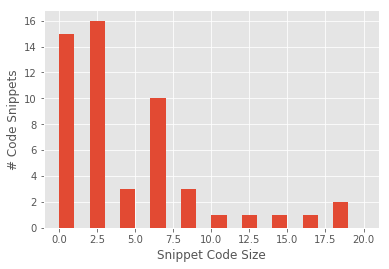

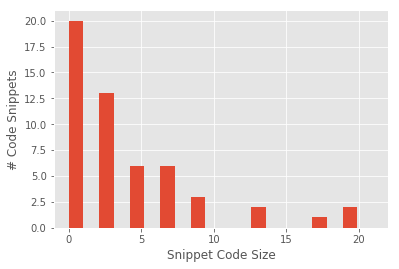

In [72]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def hist_plot(data):

    ax = data.hist(width=1)

    ax.set_title('')
    ax.set_xlabel("Snippet Code Size")
    ax.set_ylabel("# Code Snippets")

    plt.show()
    
hist_plot(snippet_size_wo_imports)

hist_plot(snippet_size)



In [ ]:
dataset_code['Code Size'].box.plot()